<a href="https://colab.research.google.com/github/jeniferwerthman/AdvAILSTM/blob/main/Copy_of_LSTMStock_Take2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import pandas_datareader as pdr
import os
import matplotlib.pyplot as mplot
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
import numpy as np
import altair as alt 
import tensorflow as tf 
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [71]:
#Import Data
stockDf = pd.read_csv('TSLA.csv',delimiter=',')
cols = list(stockDf)[4:5]
print(cols)
stockDf['openChange'] = stockDf.Open.pct_change()
stockDf['closeChange'] = stockDf.Close.pct_change()
stockDf['weekday_num'] = pd.DatetimeIndex(stockDf['Date']).weekday
stockDf['month'] = pd.DatetimeIndex(stockDf['Date']).month
stockDf['day'] = pd.DatetimeIndex(stockDf['Date']).day
stockDf['year'] = pd.DatetimeIndex(stockDf['Date']).year
stockDf['display'] = stockDf["month"].map(str)+ "-" + stockDf["year"].map(str)
print('Featured selected: {}'.format(cols))

['Close']
Featured selected: ['Close']


In [33]:
[[stockDf]]

[[            Date         Open         High         Low        Close  \
  0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
  1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
  2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
  3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
  4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
  ...          ...          ...          ...         ...          ...   
  2973  2022-04-20  1030.000000  1034.000000  975.250000   977.200012   
  2974  2022-04-21  1074.729980  1092.219971  996.419983  1008.780029   
  2975  2022-04-22  1014.909973  1034.849976  994.000000  1005.049988   
  2976  2022-04-25   978.969971  1008.619995  975.299988   998.020020   
  2977  2022-04-26   995.429993  1000.000000  875.000000   876.419983   
  
          Adj Close    Volume  openChange  closeChange  weekday_num  month  day  \
  0        4.778000  93831500         

In [49]:
(alt.Chart(stockDf).mark_line().encode(x='Date', y='Close').properties(height=400, width=500))

alt.Chart(...)

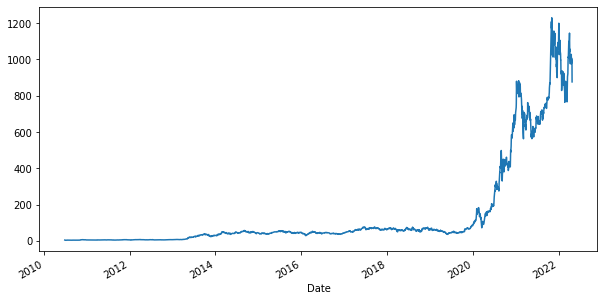

In [ ]:
stockDf.Date = pd.to_datetime(stockDf.Date, format = '%Y/%m/%d')
plot_Stock = stockDf.set_index('Date') 
plot_Stock['Close'].plot(figsize=(10,5))

In [ ]:
closedChart = (alt.Chart(stockDf).mark_line().encode(x='Date', y='closeChange', color=alt.value('black')).properties(height=400, width=2000))
openChart = (alt.Chart(stockDf).mark_line().encode(x='Date', y='openChange', color=alt.value('green')).properties(height=400, width=2000))
closedChart+openChart

In [ ]:
open = (alt.
         Chart(stockDf).
         mark_line().
         encode(x=alt.X('display', sort=['year', 'month']), y='max(Close)', color='year').
         properties(height=400, width=500))
open

In [ ]:
from altair import datum
open = (alt.
         Chart(stockDf).transform_filter(datum.year==2018).
         mark_line().
         encode(x=alt.X('display', sort=['year', 'month']), y='max(Close)', color='year').
         properties(height=200, width=500))
open

In [ ]:
from altair import datum
open = (alt.
         Chart(stockDf).transform_filter(datum.year==2018).
         mark_line().
         encode(x=alt.X('week(Date):T', sort=['year', 'month']), y='max(Close)', color='year').
         properties(height=200  , width=500))
open

In [ ]:
from altair import datum
open = (alt.
         Chart(stockDf).
         mark_line().
         encode(x=alt.X('month(Date):T'), y='max(closeChange)', color='year').
         properties(height=200  , width=500))
open

In [ ]:
from altair import datum
open = (alt.
         Chart(stockDf).transform_filter(datum.month==3).
         mark_line().
         encode(x=alt.X('day', sort=['year', 'month']), y='max(Volume)', color='year').
         properties(height=200  , width=500))
open

In [ ]:
from altair import datum
open = (alt.
         Chart(stockDf).transform_filter(datum.month==3).
         mark_line().
         encode(x=alt.X('day', sort=['year', 'month']), y='max(closeChange)', color='year').
         properties(height=200  , width=500))
open

In [75]:

print('Featured selected: {}'.format(cols))
stockDf = stockDf[cols].astype(str)
for i in cols:
    for j in range(0, len(stockDf)):
        stockDf[i][j] = stockDf[i][j].replace(',', '')

stockDf = stockDf.astype(float)

# Using multiple features (predictors)
newDf = stockDf
fromRecord = 50
toRecord = 100
myDs = newDf.loc[fromRecord:toRecord]
myDs = newDf.to_numpy()
fromRecord = 50
toRecord = 100
#newDf = newDf.loc[fromRecord:toRecord]
myDs = myDs.astype('float32')
print('Shape of training set == {}.'.format(newDf.shape))
newDf


Featured selected: ['Close']
Shape of training set == (2978, 1).


,Close
0,4.778000
1,4.766000
2,4.392000
3,3.840000
4,3.222000
...,...
2973,977.200012
2974,1008.780029
2975,1005.049988
2976,998.020020


In [ ]:
#Creating a new Dataframe & Dataset with subset of records 

#Parameters
#limitList = False
#fromRecord = 50
#toRecord = 100

#newDf = pd.DataFrame().assign(Open=stockDf['Open'], Close=stockDf['Close'], Volume=stockDf['Volume'])
#if limitList:
  #newDf = newDf.loc[fromRecord:toRecord]
#myDs = newDf.to_numpy()
#myDs = myDs.astype('float32')
#newDf.head(5)

,Open,Close,Volume
0,3.800,4.778,93831500
1,5.158,4.766,85935500
2,5.000,4.392,41094000
3,4.600,3.840,25699000
4,4.000,3.222,34334500


In [55]:
#Parameters
trainingSet = .70
featureRange1 = 0
featureRange2 = 1
newShape1 = -1
newShape2 = 1 

myDs = np.reshape(myDs, (newShape1, newShape2))
scaler = MinMaxScaler(feature_range=(featureRange1, featureRange2))
myDs = scaler.fit_transform(myDs)
trainingSize = int(len(myDs) * trainingSet)
testingSize = int(len(myDs) - trainingSize)
trainData, testData = myDs[0:trainingSize,:], myDs[testingSize:len(myDs),:]

In [56]:
#Parameters
batchSize = 5
timeSteps = 1
#Batch Data for optimization and accuracy
#This creates batches with 1 to N records.  
#X - Each Batch starts with the next item i in the list and contains specified number of additional items
#Y - Contains the last item in each batch "L" or first "F" or previious "P" or next "N"
def batchData(data, size, indexAlignment = "L"):
    X, Y = [], [] 
    for i in range(len(data) - size - 1): 
        X.append(data[i:(i + size), 0])
         
        if indexAlignment == "N":
          Y.append(data[i + size, 0])
        elif indexAlignment == "L":
          Y.append(data[i + size - 1, 0])
        elif indexAlignment == "P":  
          Y.append(data[i-1, 0])
        else:
          Y.append(data[i, 0]) 

    return np.array(X), np.array(Y)

#Catch Batches for Accuracy and Optimization
X_train, Y_train = batchData(trainData, batchSize, "L")
X_test, Y_test = batchData(testData, batchSize,"L")

In [57]:
#Reshape data to normalize it [samples, time steps, features]
print("take 2")
print('X_Train[0] (Samples): ' + str(X_train.shape[0]))
print('X_Train[1] (Features): ' + str(X_train.shape[1]))
X_train = np.reshape(X_train, (X_train.shape[0], timeSteps, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], timeSteps, X_test.shape[1]))
print("take 2")
print('X_Train[0] (Samples): ' + str(X_train.shape[0]))
print('X_Train[1] (Features): ' + str(X_train.shape[1]))

take 2
X_Train[0] (Samples): 2078
X_Train[1] (Features): 5
take 2
X_Train[0] (Samples): 2078
X_Train[1] (Features): 1


In [58]:
#Parameters
verboseAmt = 1
epochCnt = 25
shuffleData = False
dropOut = 0.2
lstmActivation = 'relu'
activationLayer = 'linear'
lossType = 'mean_squared_error'
optimizerType = 'adam'
lstmUnits = 50
lstmMultipleLayers = True

model = Sequential()

if lstmMultipleLayers:
  model.add(LSTM(units = lstmUnits, return_sequences = True, activation = lstmActivation, input_shape = (X_train.shape[1], batchSize)))
  model.add(Dropout(dropOut))

  model.add(LSTM(units = lstmUnits, return_sequences = True))
  model.add(Dropout(dropOut))

  model.add(LSTM(units = lstmUnits, return_sequences = True))
  model.add(Dropout(dropOut))

  model.add(LSTM(units = lstmUnits))
  model.add(Dropout(dropOut))
else:
  model.add(LSTM(units = lstmUnits, activation = lstmActivation, input_shape = (X_train.shape[1], batchSize))) 
  model.add(Dropout(dropOut))

model.add(Dense(1, activation = activationLayer))
model.compile(loss = lossType, optimizer = optimizerType)
modelFit = model.fit(X_train, Y_train, epochs = epochCnt, batch_size = batchSize, validation_data = (X_test, Y_test), verbose = verboseAmt, shuffle = False)
model.summary()

Epoch 1/25
416/416 [==============================] - 12s 13ms/step - loss: 1.7040e-05 - val_loss: 0.0699
Epoch 2/25
416/416 [==============================] - 3s 8ms/step - loss: 4.7884e-05 - val_loss: 0.0697
Epoch 3/25
416/416 [==============================] - 4s 9ms/step - loss: 5.9432e-05 - val_loss: 0.0698
Epoch 4/25
416/416 [==============================] - 4s 10ms/step - loss: 6.3018e-05 - val_loss: 0.0697
Epoch 5/25
416/416 [==============================] - 4s 9ms/step - loss: 6.0831e-05 - val_loss: 0.0697
Epoch 6/25
416/416 [==============================] - 4s 8ms/step - loss: 6.2491e-05 - val_loss: 0.0698
Epoch 7/25
416/416 [==============================] - 3s 8ms/step - loss: 6.4431e-05 - val_loss: 0.0698
Epoch 8/25
416/416 [==============================] - 4s 10ms/step - loss: 6.3433e-05 - val_loss: 0.0698
Epoch 9/25
416/416 [==============================] - 4s 10ms/step - loss: 6.2552e-05 - val_loss: 0.0698
Epoch 10/25
416/416 [==============================] - 3s 8

In [59]:
#Predictions
train_predict = model.predict(X_train)
print(X_train)
Y_trained_predict = scaler.inverse_transform(train_predict)

test_predict = model.predict(X_test)
Y_test_predict = scaler.inverse_transform(test_predict)

Y_test = scaler.inverse_transform([Y_test])
Y_train = scaler.inverse_transform([Y_train])

[[[1.3189320e-03 1.3091499e-03 1.0042798e-03 5.5431016e-04 5.0539849e-05]]

 [[1.3091499e-03 1.0042798e-03 5.5431016e-04 5.0539849e-05 0.0000000e+00]]

 [[1.0042798e-03 5.5431016e-04 5.0539849e-05 0.0000000e+00 2.7063373e-04]]

 ...

 [[4.6495214e-02 4.7895662e-02 4.7559816e-02 4.0590178e-02 4.8078258e-02]]

 [[4.7895662e-02 4.7559816e-02 4.0590178e-02 4.8078258e-02 4.6500102e-02]]

 [[4.7559816e-02 4.0590178e-02 4.8078258e-02 4.6500102e-02 4.5486040e-02]]]


In [60]:
print('X_train: ' + str(len(X_train)))
print('X_test: ' + str(len(X_test)))
print('Y_train: ' + str(len(Y_train)))
print('Y_test: ' + str(len(Y_test)))
print('X Train Shape' + str(X_train.shape))
print('train_predict: ' + str(len(train_predict)))
print('Y_trained_predict: ' + str(len(Y_trained_predict)))
print('test_predict: ' + str(len(test_predict)))
print('Y_test_predict: ' + str(len(Y_test_predict)))
print('Shape of Y_train:'  + str(Y_train.shape[0]))
print('Shape of Y_train:' + str(Y_train.shape[0]))
print('Shape of Y_train:'  + str(Y_train.shape[0]))
print('Shape of Y_train:'  + str(Y_train.shape[0]))

X_train: 2078
X_test: 2078
Y_train: 1
Y_test: 1
X Train Shape(2078, 1, 5)
train_predict: 2078
Y_trained_predict: 2078
test_predict: 2078
Y_test_predict: 2078
Shape of Y_train:1
Shape of Y_train:1
Shape of Y_train:1
Shape of Y_train:1


In [61]:
#inverse the inverse
Y_trained_predict = scaler.inverse_transform(train_predict)
Y_test_predict = scaler.inverse_transform(test_predict)

s1 = Y_test.shape[0]
s2 = Y_test.shape[1]
Y_test = Y_test.reshape(s2,s1)
s1 = Y_train.shape[0]
s2 = Y_train.shape[1]
Y_train = Y_train.reshape(s2,s1)

In [62]:
#Calculate Accuracy
train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_trained_predict))
test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_predict))

print('Train RMSE is: ')
print(train_RMSE, '\n')
print('Test RMSE is: ')
print(test_RMSE)

Train RMSE is: 
37.424566513073586 

Test RMSE is: 
324.0280105516345


In [63]:
#Actual vs Predicted Data
Y = np.append(Y_train, Y_test)
Y_hat = np.append(Y_trained_predict, Y_test_predict)
result_df = pd.DataFrame()
result_df['Actual_Y'] = Y
result_df['Predicted_Y'] = Y_hat
result_df.head()

,Actual_Y,Predicted_Y
0,3.222,63.43745
1,3.160,63.43745
2,3.492,63.43745
3,3.480,63.43745
4,3.410,63.43745


Text(0, 0.5, 'Value of Stock')

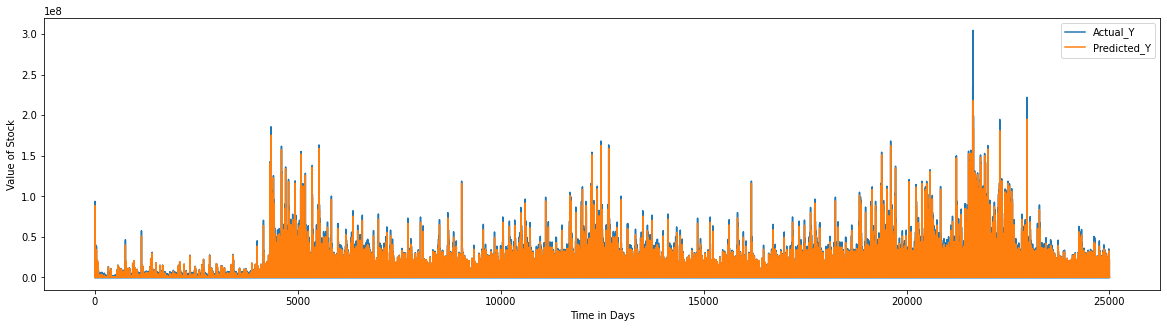

In [45]:
#Actual vs Predicted Graph
result_df.plot(figsize=(20,5))
mplot.xlabel('Time in Days')
mplot.ylabel('Value of Stock')